In [1]:
# All required packages imported into the notebook

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline


C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
UsageError: Line magic function `%` not found.


In [2]:
# Dataframe is createdfrom the provided txt doc

auto_df = pd.read_csv('automobile.txt')
auto_df.shape#head()

(205, 26)

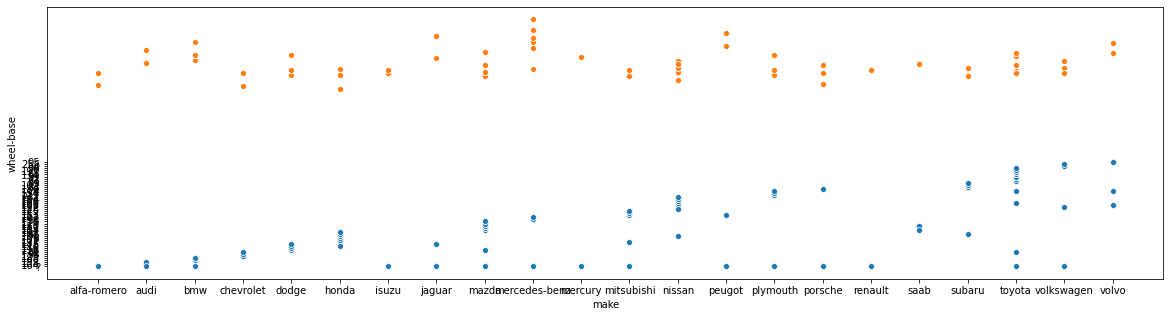

<Figure size 1440x360 with 0 Axes>

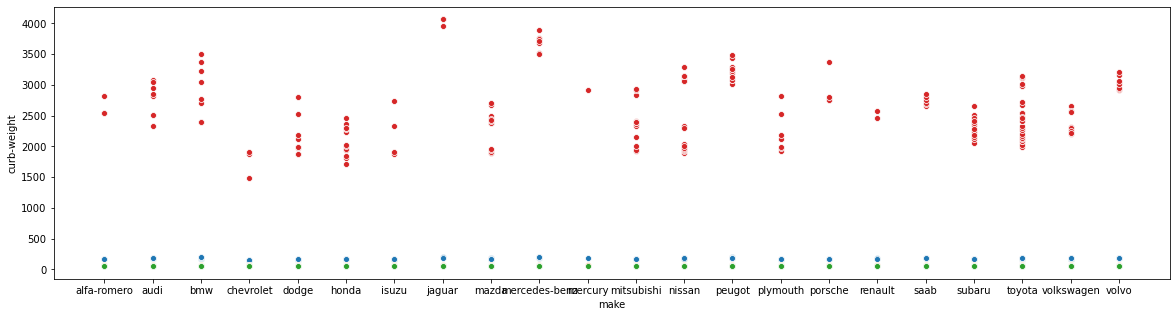

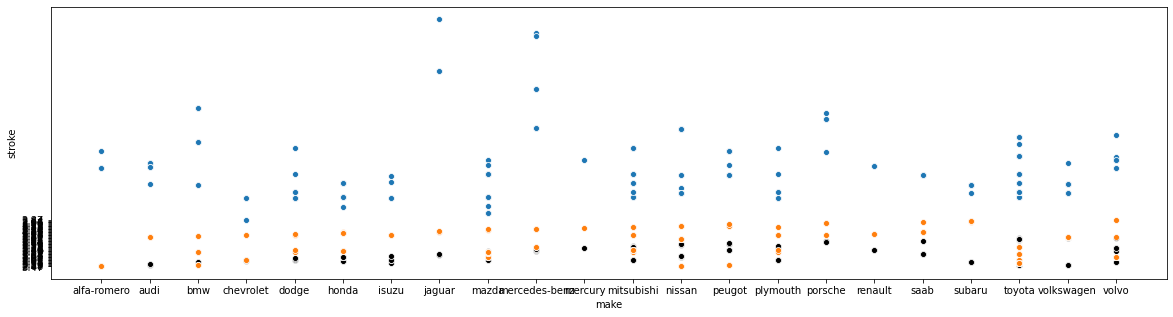

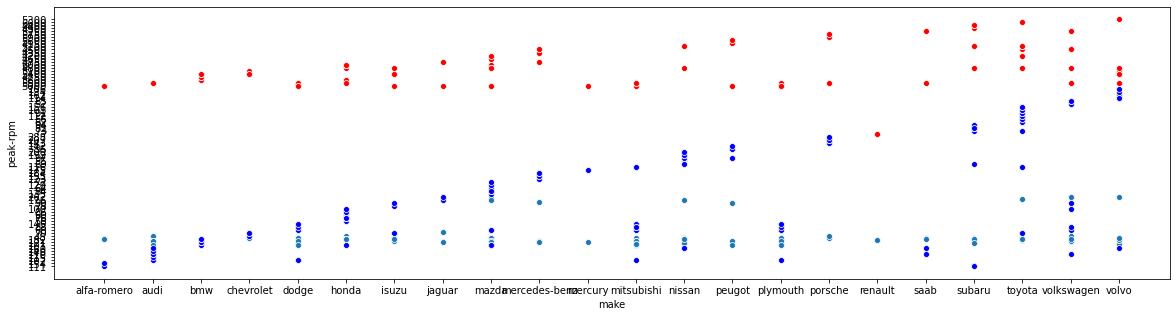

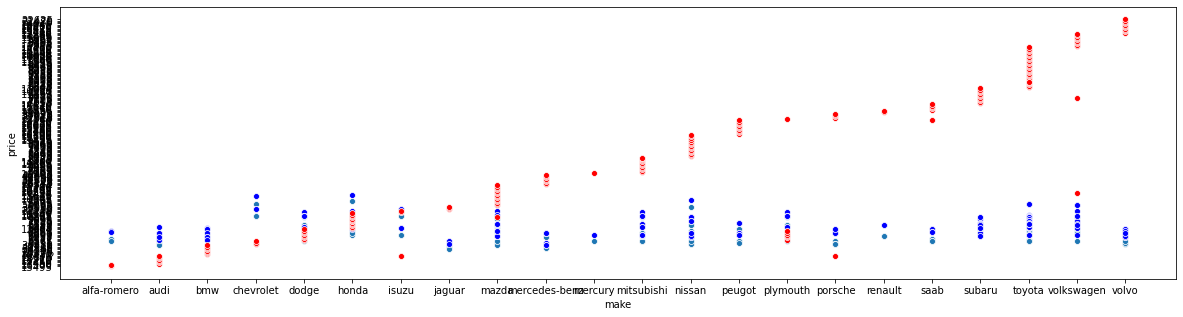

In [78]:
# The data is to be cleaned by searching for outliers, confirming uniform formatting
# and dropping unneccesary columns if need be to produce a more efficient dataset

plt.figure(figsize=(20,5))
ax1 = sns.scatterplot(x='make', y='normalized-losses', data=auto_df)
sns.scatterplot(x='make', y='wheel-base', data=auto_df, ax = ax1)
# There is a general trend with some low values but seemingly usable

plt.figure(figsize=(20,5))

# Data seems well spread with no outliers
# The following plots were produced for all other columns to
# determine if there is any skewed data

plt.figure(figsize=(20,5))
ax2 = sns.scatterplot(x='make', y='length', data=auto_df)
sns.scatterplot(x='make', y='width', data=auto_df, ax=ax2)
sns.scatterplot(x='make', y='height', data=auto_df, ax=ax2)
sns.scatterplot(x='make', y='curb-weight', data=auto_df, ax=ax2)

plt.figure(figsize=(20,5))
ax3 = sns.scatterplot(x='make', y='bore', data=auto_df, color='black')
sns.scatterplot(x='make', y='engine-size', data=auto_df, ax=ax3)
sns.scatterplot(x='make', y='stroke', data=auto_df, ax=ax3)

plt.figure(figsize=(20,5))
ax4 = sns.scatterplot(x='make', y='compression-ratio', data=auto_df)
sns.scatterplot(x='make', y='horsepower', data=auto_df, ax=ax4, color = 'blue')
sns.scatterplot(x='make', y='peak-rpm', data=auto_df, ax=ax4, color = 'red')

plt.figure(figsize=(20,5))
ax5 = sns.scatterplot(x='make', y='city-mpg', data=auto_df)
sns.scatterplot(x='make', y='highway-mpg', data=auto_df, ax=ax5, color = 'blue')
sns.scatterplot(x='make', y='price', data=auto_df, ax=ax5, color = 'red')

# Aside form the "?"/NaN values, the data seems realistically distributed

# All columns contain useful information to be used in the EDA and therefore
# none will be dropped from the DF

In [120]:
# The degree of missingness is confirmed below

auto_df.isnull()

# The code returns zero null values, but we do see "?" characters 
# present in the dataset

auto_df.replace('?', np.NaN).isnull().sum()    # Replaces "?" values with NaN to return isnull()

# The following code returns the decimal percentage of the proportion
# of data that is missing, ie "normalized-losses" have 20% of he records missing

auto_df.replace('?', np.NaN).isnull().sum() / (auto_df.replace('?', 
                            np.NaN).notnull().sum() + auto_df.replace('?', 
                            np.NaN).isnull().sum())

auto_df = auto_df.replace('?', np.NaN)   # df created with full set of records
auto_df_clean = auto_df.dropna()         # df created with dropped NaN records

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 <a list of 22 Text major ticklabel objects>)

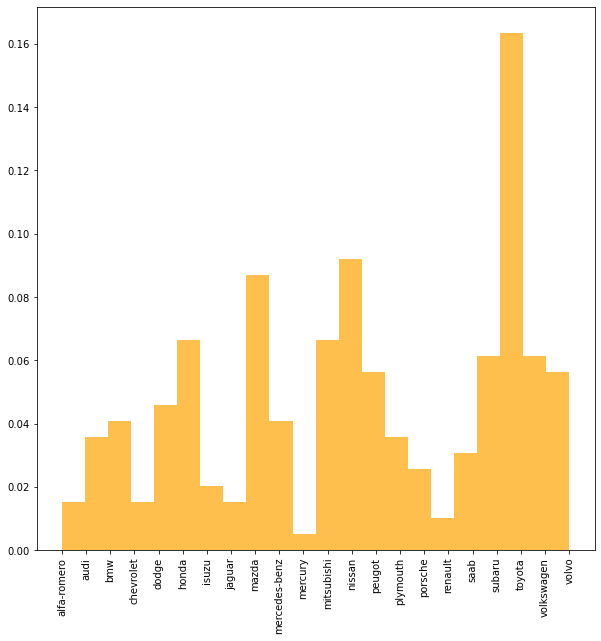

In [98]:
# Visualization 1
# Car make histogram
# The histogram plot indicates which makes have the most types
# of models. 

make_group = auto_df.groupby(by=['make']).size()

plt.figure(figsize=(10,10))
plt.hist(auto_df['make'], 22, density =10,facecolor="orange", alpha=0.7)
plt.xticks(rotation='vertical')

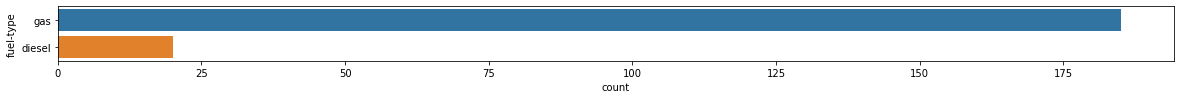

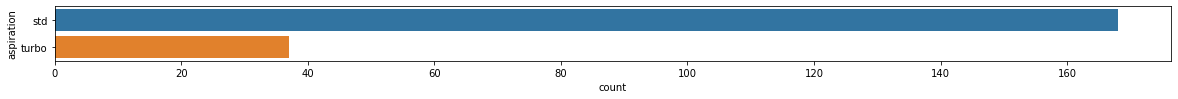

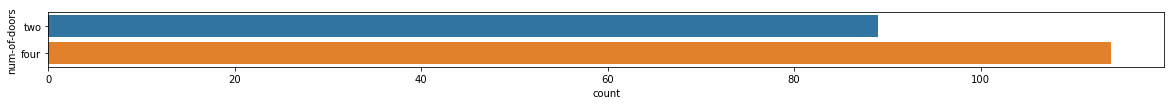

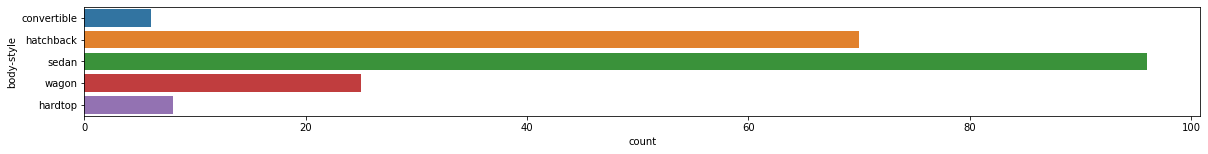

In [101]:
# Visualization 2
# A fundamental population distribution between defining characteristics
# The horizontal bar plots give an indication of the proportion of the population 
# that belongs to each key attribute

fig = plt.figure(figsize=(20,1))
sns.countplot(y='fuel-type', data=auto_df);

fig = plt.figure(figsize=(20,1))
sns.countplot(y='aspiration', data=auto_df);

fig = plt.figure(figsize=(20,1))
sns.countplot(y='num-of-doors', data=auto_df);

fig = plt.figure(figsize=(20,2))
sns.countplot(y='body-style', data=auto_df);

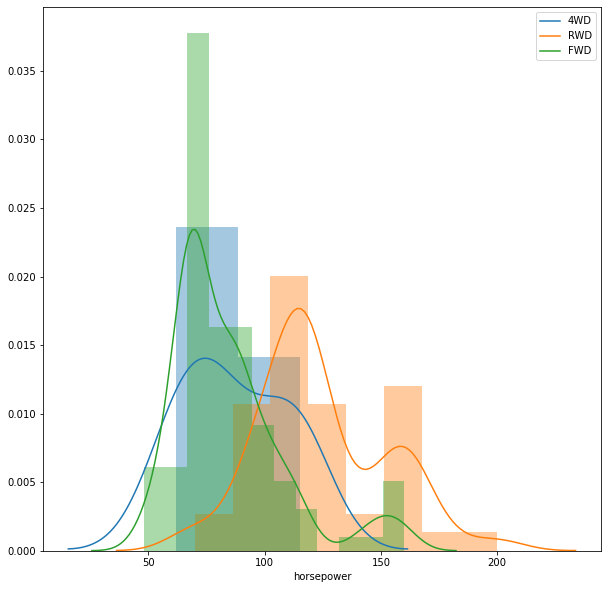

In [139]:
# Visualization 3
# Distribution of horsepower per drive type
# The plots show the range of horsepower available per drive type

fig = plt.figure(figsize=(10, 10))
sns.distplot(auto_df_clean.loc[auto_df_clean['drive-wheels'] == '4wd']['horsepower'].astype(int), kde_kws={'label': '4WD'});
sns.distplot(auto_df_clean.loc[auto_df_clean['drive-wheels'] == 'rwd']['horsepower'].astype(int), kde_kws={'label': 'RWD'});
sns.distplot(auto_df_clean.loc[auto_df_clean['drive-wheels'] == 'fwd']['horsepower'].astype(int), kde_kws={'label': 'FWD'});

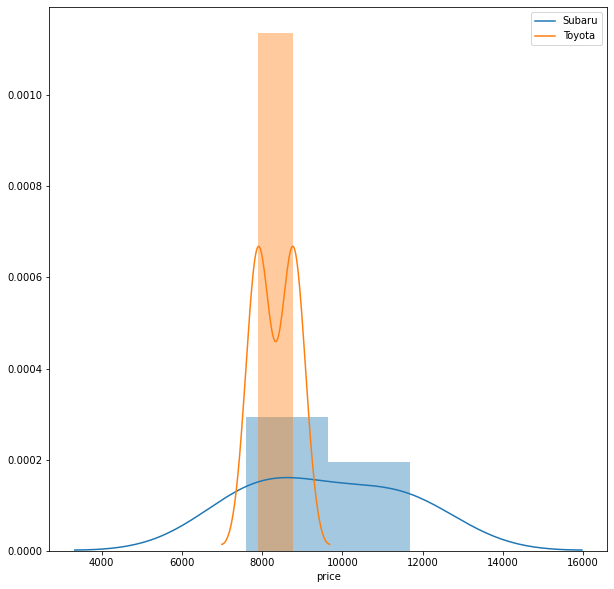

In [173]:
# Visualization 4
# Distribution of price per car make for 4wd options
# The plots show the range of prices available per make for Subaru and Toyota with 4wd drive type

drive_group = auto_df_clean[auto_df_clean['drive-wheels'] == '4wd']

fig = plt.figure(figsize=(10, 10))
sns.distplot(drive_group.loc[drive_group['make'] == 'subaru']['price'].astype(int), kde_kws={'label': 'Subaru'});
sns.distplot(drive_group.loc[drive_group['make'] == 'toyota']['price'].astype(int), kde_kws={'label': 'Toyota'});

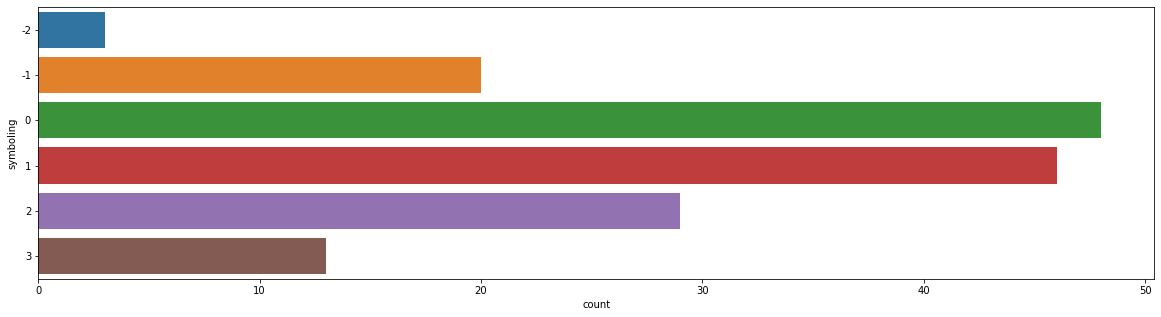

In [178]:
# Visualization 5
# horizontal bar plot showing cumulative symboling categories
# The bar represent the total population count for each symbol showing a 
# normal distribution with majority of models ranking over "0" and "1"

fig = plt.figure(figsize=(20,5))
sns.countplot(y=auto_df_clean['symboling'], data=auto_df_clean);

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


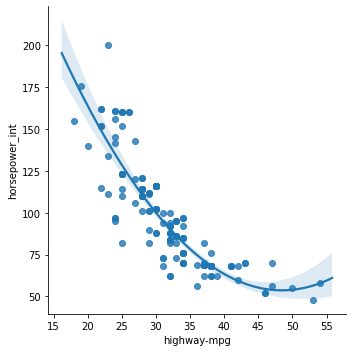

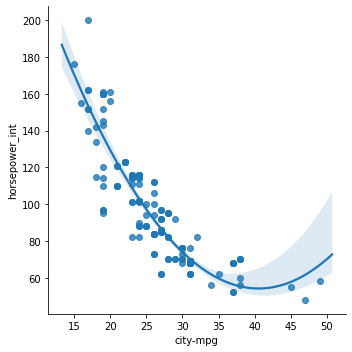

In [192]:
# Visualization 6
# A scatter plot with second degree regression line 
# The data plots the miles per gallon vs horsepower for both city
# and highway driving

auto_df_clean['horsepower_int'] = auto_df_clean['horsepower'].astype(int)

sns.lmplot(x="highway-mpg", y="horsepower_int", order=2, data=auto_df_clean)
sns.lmplot(x="city-mpg", y="horsepower_int", order=2, data=auto_df_clean)

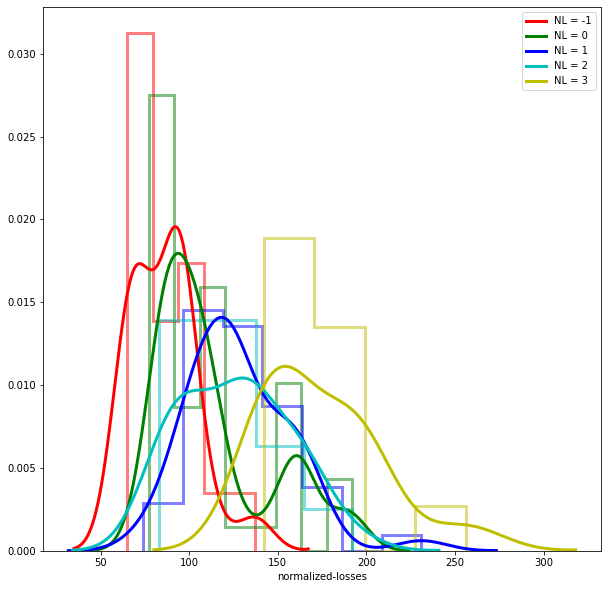

In [218]:
# Visualization 7
# A plot highlighting the effect that a higher symboling has on the normalized losses 
# The graphs show a distribution of normalized losses for each symbol category ranging from
# -2 to 3

fig = plt.figure(figsize=(10, 10))
#sns.distplot(auto_df_clean.loc[auto_df_clean['symboling'] == -2]['normalized-losses'].astype(int), kde_kws={'label': 'NL = -2'});
sns.distplot(auto_df_clean.loc[auto_df_clean['symboling'] == -1]['normalized-losses'].astype(int), kde_kws={"color": "r",
                 "lw": 3,'label': 'NL = -1'}, hist_kws={"histtype": "step", "linewidth": 3, "alpha": 0.5, "color": "r"});

sns.distplot(auto_df_clean.loc[auto_df_clean['symboling'] == 0]['normalized-losses'].astype(int), kde_kws={"color": "g",
                "lw": 3,'label': 'NL = 0'}, hist_kws={"histtype": "step", "linewidth": 3, "alpha": 0.5, "color": "g"});

sns.distplot(auto_df_clean.loc[auto_df_clean['symboling'] == 1]['normalized-losses'].astype(int), kde_kws={"color": "b",
                "lw": 3,'label': 'NL = 1'}, hist_kws={"histtype": "step", "linewidth": 3, "alpha": 0.5, "color": "b"});

sns.distplot(auto_df_clean.loc[auto_df_clean['symboling'] == 2]['normalized-losses'].astype(int), kde_kws={"color": "c",
                "lw": 3,'label': 'NL = 2'}, hist_kws={"histtype": "step", "linewidth": 3, "alpha": 0.5, "color": "c"});

sns.distplot(auto_df_clean.loc[auto_df_clean['symboling'] == 3]['normalized-losses'].astype(int), kde_kws={"color": "y",
                "lw": 3,'label': 'NL = 3'}, hist_kws={"histtype": "step", "linewidth": 3, "alpha": 0.5, "color": "y"});
